Predict Student Performance based on variables like :
* Hours Studied: The total number of hours spent studying by each student.
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("Student_Performance.csv")
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
columns_with_miss = df.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
columns_with_miss

Series([], dtype: int64)

There is no missing values to deal with.

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


* Hours Studied between 1 (min) and 9 (max)  
* Previous Scores between 40 and 99
* Sleep Hours between 4 and 9
* Sample Question Papers Practiced between 0 and 9
* Performance Index between 10 and 100

Everything makes sense (no student has a Performance Index of 101 or slept -1 hours) so clearly there is no outliers.

In [ ]:
df['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

In [ ]:
binary_coding = {"Yes": 1, "No": 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(binary_coding)

In [ ]:
df['Extracurricular Activities'].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

In [ ]:
y = df['Performance Index']
X = df.drop(columns='Performance Index')

In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 25)

In [ ]:
knn_regressor = KNeighborsRegressor(5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

1.9849333333333334

The model is good let's see if there is better K

In [ ]:
evaluation = {}
min_mae = 100
best_k = None

for k in range(1, 16):
    knn_loop = KNeighborsRegressor(k)
    knn_loop.fit(X_train, y_train)
    y_pred = knn_loop.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    if mae < min_mae:
        best_k = k
        min_mae = mae

    evaluation[k] = mae

In [ ]:
best_k

12

In [ ]:
min_mae

1.864222222222222

In [ ]:
evaluation

{1: 2.6496666666666666,
 2: 2.2583333333333333,
 3: 2.094111111111111,
 4: 2.0245,
 5: 1.9849333333333334,
 6: 1.9448333333333334,
 7: 1.9273809523809522,
 8: 1.9067083333333332,
 9: 1.8899629629629628,
 10: 1.8762999999999999,
 11: 1.8675757575757574,
 12: 1.864222222222222,
 13: 1.8663076923076924,
 14: 1.8701190476190477,
 15: 1.8667777777777779}

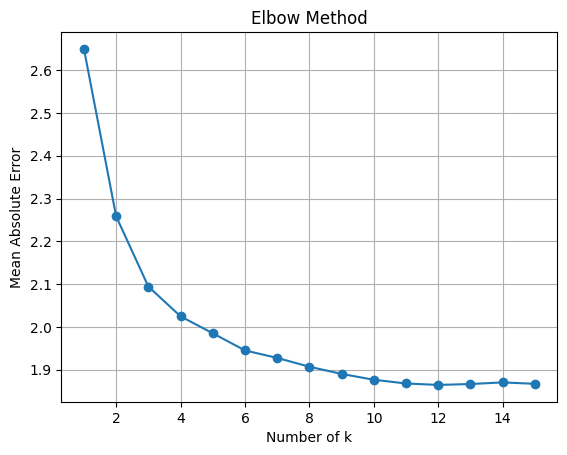

In [ ]:
k_values = list(evaluation.keys())
mae_values = list(evaluation.values())

plt.plot(k_values, mae_values, marker='o')
plt.xlabel('Number of k')
plt.ylabel('Mean Absolute Error')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

5 is the optimal number of K for this model.